In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import csv
from PIL import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import binary_accuracy
import pandas as pd

tf.random.set_seed(15) # 1 tf 40 np = 32 tops
np.random.seed(40)

# Setup dataset

In [2]:
cd

C:\Users\ivann


c:\Users\ivann\anaconda3\envs\deep_learning\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
c:\Users\ivann\anaconda3\envs\deep_learning\Lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
cd ".\Documents\School\8vo. Semestre\Deep Learning"

C:\Users\ivann\Documents\School\8vo. Semestre\Deep Learning


c:\Users\ivann\anaconda3\envs\deep_learning\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
images = []
target = []
with open('./Image_Processing/Image_Classifier/dataset_64x64.csv', newline='') as csvfile:
    dataset = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(dataset):
        if i > 0:
            if row[0] == 'landscape':

                # image
                image_path = f'./Dataset/dataset/landscape_dat/landscape_64x64_bw/{row[1]}'

            if row[0] == 'imagenet':

                # image
                image_path = f'./Dataset/dataset/imagenet/imagenet_64x64_bw/{row[1]}'

            image = Image.open(image_path)
            data = np.asarray(image)
            images.append(data)

            #classification target
            if row[2]=='siggraph_2016':
                target.append(0)
            elif row[2]=='larsson_2016':
                target.append(1)
            elif row[2]=='zhang_2016':
                target.append(2)
            elif row[2]=='ddcolor':
                target.append(3)
            else:
                print(row)
                x = input("Enter")

images = np.array(images)
target = np.array(target)

In [28]:
print(images.shape)
rgb_batch = np.repeat(images[..., np.newaxis], 3, -1)
print(rgb_batch.shape)
print(target.shape)

(15328, 64, 64)
(15328, 64, 64, 3)
(15328,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(rgb_batch, target, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [31]:
X_train, X_val, X_test = X_train / 255., X_val / 255., X_test / 255.

In [32]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12415, 64, 64, 3)
(1380, 64, 64, 3)
(1533, 64, 64, 3)


In [33]:
print(np.bincount(y_train))
print(len(y_train))

[6277 1395 1965 2778]
12415


In [34]:
X_train_equal = []
y_train_equal = []
ids = np.arange(12415)
for c in range(4):
    class_id = ids[y_train == c]
    choice = np.random.choice(class_id, 1395, replace=False)
    X_train_equal.append(X_train[choice])
    y_train_equal.append(y_train[choice])
X_train_equal = np.array(X_train_equal)
y_train_equal = np.array(y_train_equal)

In [35]:
y_train_equal = np.concatenate((y_train_equal))
X_train_equal = np.concatenate((X_train_equal))
print(y_train_equal.shape)
print(X_train_equal.shape)

(5580,)
(5580, 64, 64, 3)


In [36]:
print(np.bincount(y_val))
print(len(y_val))

[655 155 253 317]
1380


In [37]:
X_val_equal = []
y_val_equal = []
ids = np.arange(1380)
for c in range(4):
    class_id = ids[y_val == c]
    choice = np.random.choice(class_id, 155, replace=False)
    X_val_equal.append(X_val[choice])
    y_val_equal.append(y_val[choice])
X_val_equal = np.array(X_val_equal)
y_val_equal = np.array(y_val_equal)

In [38]:
y_val_equal = np.concatenate((y_val_equal))
X_val_equal = np.concatenate((X_val_equal))
print(y_val_equal.shape)
print(X_val_equal.shape)

(620,)
(620, 64, 64, 3)


In [39]:
print(np.bincount(y_test))
print(len(y_test))

[791 175 227 340]
1533


In [40]:
X_test_equal = []
y_test_equal = []
ids = np.arange(1533)
for c in range(4):
    class_id = ids[y_test == c]
    choice = np.random.choice(class_id, 175 , replace=False)
    X_test_equal.append(X_test[choice])
    y_test_equal.append(y_test[choice])
X_test_equal = np.array(X_test_equal)
y_test_equal = np.array(y_test_equal)

In [41]:
y_test_equal = np.concatenate((y_test_equal))
X_test_equal = np.concatenate((X_test_equal))
print(y_test_equal.shape)
print(X_test_equal.shape)

(700,)
(700, 64, 64, 3)


In [42]:
#evaluation = model.evaluate(X_test, y_test,
#                                      steps=X_test.shape[0] // 50)

#print('Model Accuracy = %.2f' % (evaluation[1]))

# Model Construction

In [43]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer((64, 64, 3)))
model.add(keras.layers.RandomFlip("horizontal"))
#model.add(keras.layers.RandomRotation(0.3))

model.add(keras.layers.Conv2D(filters=6, kernel_size=(2,2), padding='same', activation='tanh')) #6
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=1))
model.add(keras.layers.Conv2D(filters=50, kernel_size=(2,2), padding='valid', activation='tanh')) #50
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=1))
model.add(keras.layers.Conv2D(filters=160, kernel_size=(2,2), padding='valid', activation='tanh')) # 160
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu')) # 100
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(30, activation='relu')) # 30
#model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(10, activation='relu')) #10
model.add(keras.layers.Dense(4, activation='softmax'))

In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
#history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

#model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.0001,
)
# Define a learning rate schedule
#learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=0.005,
#    decay_steps=100,
#    decay_rate=0.95
#)

# Create an optimizer with the learning rate schedule
#optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate_schedule)

#model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train_equal, y_train_equal,
                    epochs=100, 
                    verbose=1, 
                    validation_data=(X_val_equal, y_val_equal),
                    callbacks=[lr_callback]) # validation_steps=len((X_val, y_val))/16

Epoch 1/100
175/175 [==============================] - 144s 813ms/step - loss: 1.6332 - accuracy: 0.2575 - val_loss: 1.3863 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/100
 72/175 [===========>..................] - ETA: 58s - loss: 1.3979 - accuracy: 0.2439

KeyboardInterrupt: 

In [231]:
%history

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import csv
from PIL import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import binary_accuracy
import pandas as pd

tf.random.set_seed(4)
np.random.seed(25)
cd
cd ".\Documents\School\8vo. Semestre\Deep Learning"
images = []
target = []
with open('./Image_Processing/Image_Classifier/dataset_64x64.csv', newline='') as csvfile:
    dataset = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(dataset):
        if i > 0:
            if row[0] == 'landscape':

                # image
                image_path = f'./Dataset/dataset/landscape_dat/landscape_64x64_bw/{row[1]}'

            if row[0] == 'imagenet':

                # imag

<Axes: >

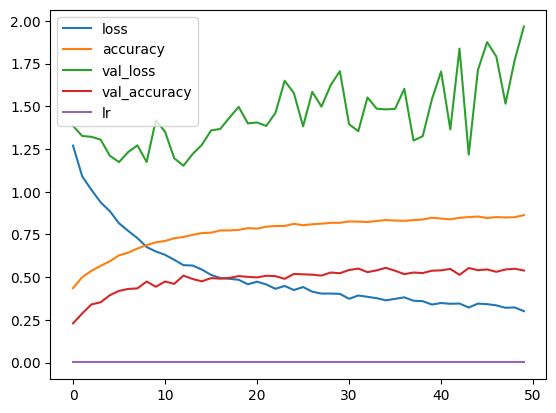

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
df.plot()

In [ ]:
evaluation = model.evaluate(X_test, y_test,
                                      steps=X_test.shape[0] // 50)

print('Model Accuracy = %.2f' % (evaluation[1]))

25/25 [==============================] - 2s 91ms/step - loss: 2.4442 - accuracy: 0.4112
Model Accuracy = 0.41


40/40 [==============================] - 2s 61ms/step


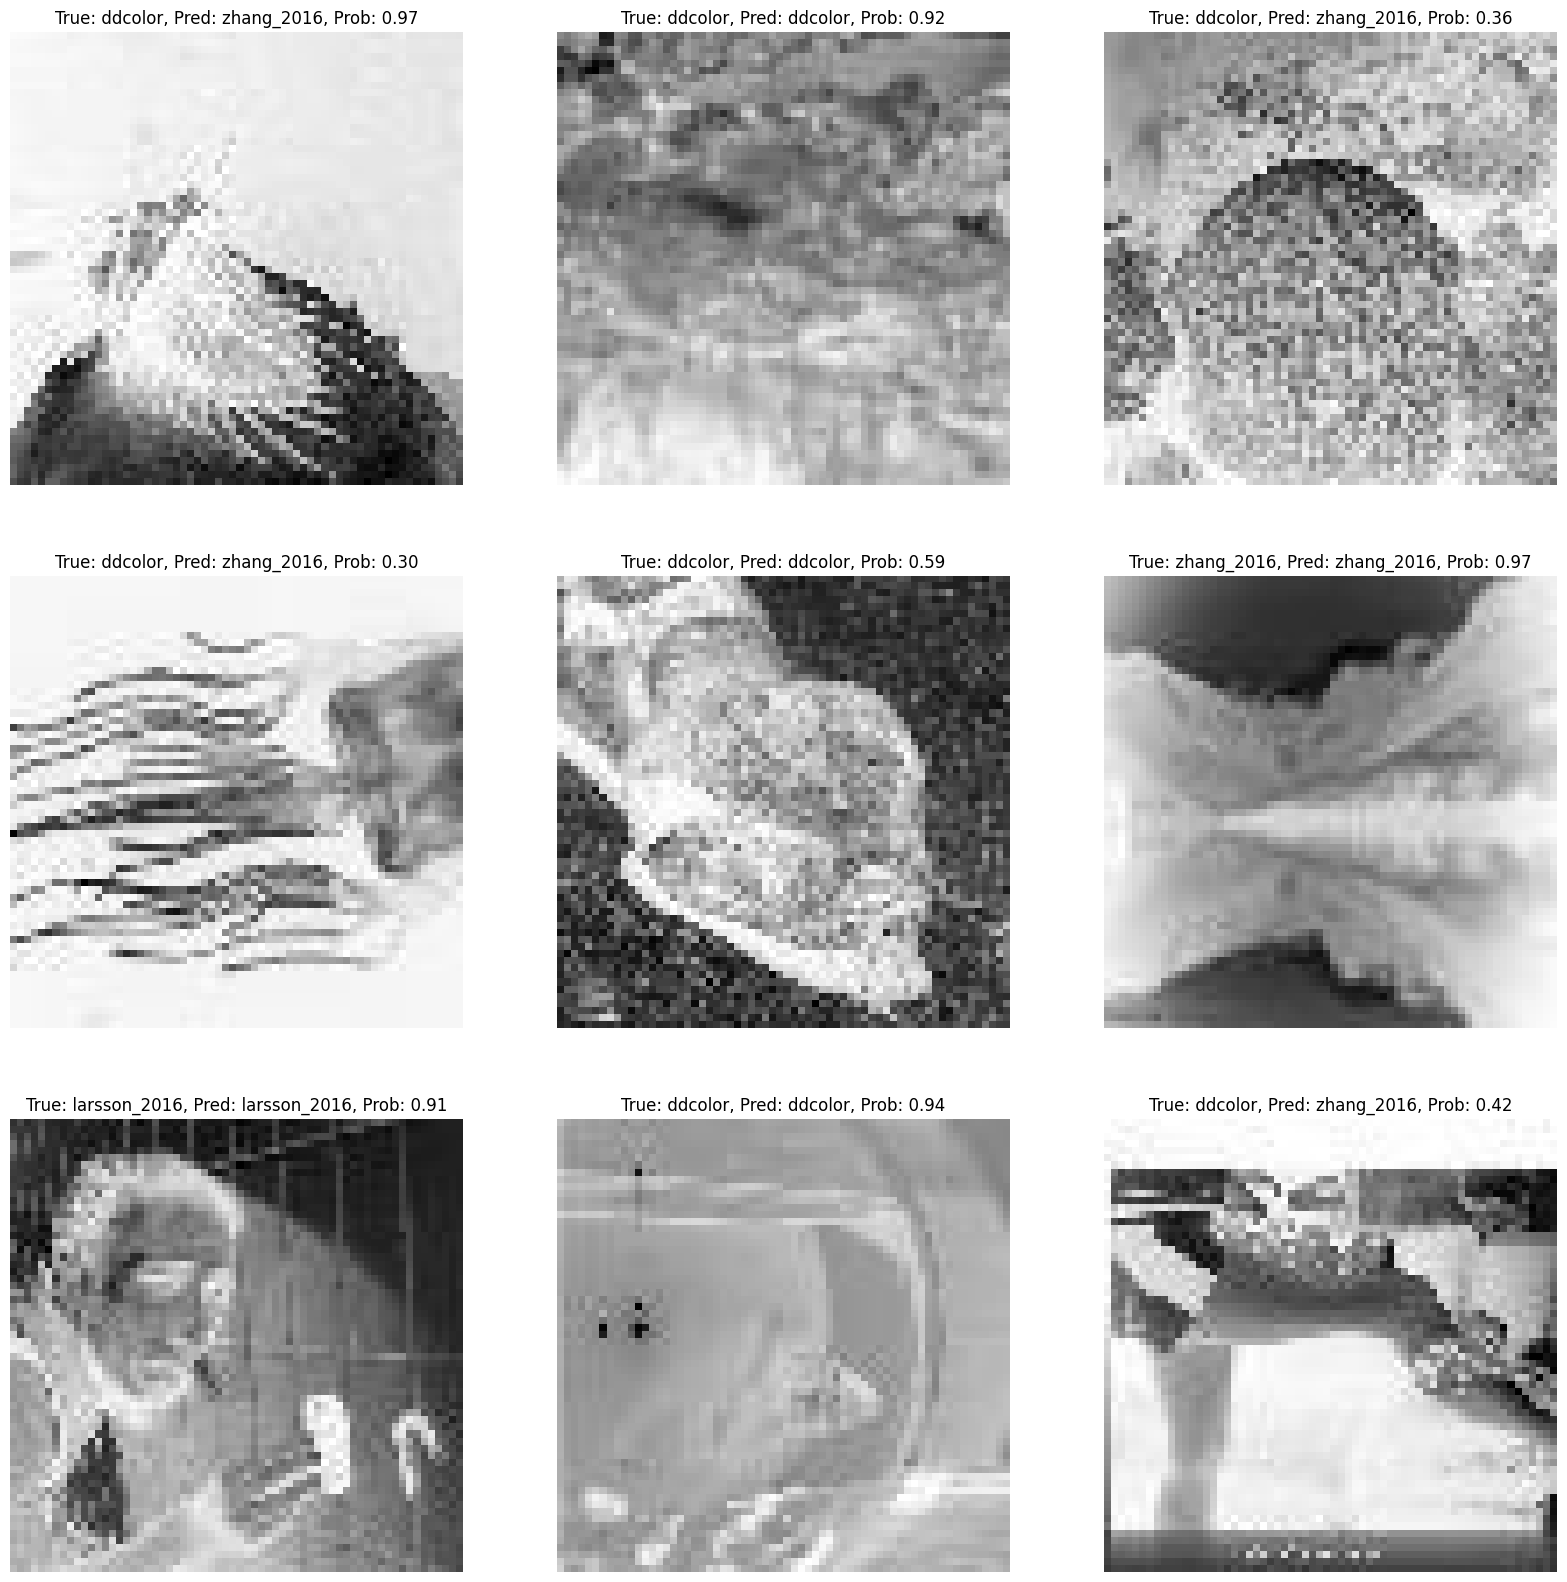

In [ ]:
test_images = X_test
test_labels = y_test
models = ['ddcolor', 'larsson_2016', 'siggraph_2016', 'zhang_2016']


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_labels


predicted_probabilities = np.max(predictions, axis=1)
image_shapes = test_images.shape[1:]
fig = plt.figure(figsize=(20, 20))

start = 0
for i in range(start,start+9):
  image = test_images[i]
  ax = fig.add_subplot(3, 3, i-start + 1)
  ax.set_title(f"True: {models[true_labels[i]]}, Pred: {models[predicted_labels[i]]}, Prob: {predicted_probabilities[i]:.2f}")
  ax.axis('off')
  plt.imshow(image, cmap="gray_r")

plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[64, 64])) # Entrada
model.add(tf.keras.layers.Flatten()) # Aplanar la entrada
#model.add(tf.keras.layers.Dense(100, activation="relu")) # Capa oculta 300 neuronas
model.add(tf.keras.layers.Dense(100, activation="relu")) # Capa oculta 300 neuronas
model.add(tf.keras.layers.Dense(4, activation="softmax")) # Probabilidad de clase x las 10 clases a la salida

In [ ]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.1
)

model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), class_weight=class_weight, callbacks=[lr_callback])

Epoch 1/20
187/187 [==============================] - 1s 5ms/step - loss: 9.3951e-04 - accuracy: 0.2622 - val_loss: 1.3481 - val_accuracy: 0.3133 - lr: 0.0010
Epoch 2/20
187/187 [==============================] - 1s 4ms/step - loss: 9.2060e-04 - accuracy: 0.3032 - val_loss: 1.3259 - val_accuracy: 0.3660 - lr: 0.0010
Epoch 3/20
187/187 [==============================] - 1s 4ms/step - loss: 9.1467e-04 - accuracy: 0.3159 - val_loss: 1.3560 - val_accuracy: 0.3404 - lr: 0.0010
Epoch 4/20
187/187 [==============================] - 1s 5ms/step - loss: 9.0794e-04 - accuracy: 0.3213 - val_loss: 1.3512 - val_accuracy: 0.3253 - lr: 0.0010
Epoch 5/20
187/187 [==============================] - 1s 6ms/step - loss: 9.0551e-04 - accuracy: 0.3156 - val_loss: 1.4046 - val_accuracy: 0.3012 - lr: 0.0010
Epoch 6/20
187/187 [==============================] - 1s 7ms/step - loss: 9.0182e-04 - accuracy: 0.3285 - val_loss: 1.3336 - val_accuracy: 0.3419 - lr: 0.0010
Epoch 7/20
187/187 [==========================

KeyboardInterrupt: 

# Hyperparameter Tunning

In [25]:
%load_ext tensorboard

In [26]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [55]:
HP_NUM_UNITS_1 = hp.HParam('num_units_1', hp.Discrete([5, 10, 15]))
HP_NUM_UNITS_2 = hp.HParam('num_units_2', hp.Discrete([20, 30, 40, 50, 60, 80]))
HP_NUM_UNITS_3 = hp.HParam('num_units_3', hp.Discrete([100, 125, 150, 175, 200]))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS_1, HP_NUM_UNITS_2, HP_NUM_UNITS_3],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [56]:
def train_test_model(hparams):
  model = tf.keras.models.Sequential([
    keras.layers.InputLayer((64, 64, 1)),
    keras.layers.RandomFlip("horizontal"),
    keras.layers.Conv2D(filters=hparams[HP_NUM_UNITS_1], kernel_size=(2,2), padding='same', activation='tanh'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=1),
    keras.layers.Conv2D(filters=hparams[HP_NUM_UNITS_2], kernel_size=(2,2), padding='valid', activation='tanh'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=1),
    keras.layers.Conv2D(filters=hparams[HP_NUM_UNITS_3], kernel_size=(2,2), padding='valid', activation='tanh'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_1]*2, activation=tf.nn.relu),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS_1], activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
  ])

  model.compile(
      optimizer='nadam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(X_train_equal, y_train_equal, epochs=1) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(X_test_equal, y_test_equal)
  return accuracy

In [57]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)


In [58]:
session_num = 0

for num_units_1 in HP_NUM_UNITS_1.domain.values:
  for num_units_2 in HP_NUM_UNITS_2.domain.values:
    for num_units_3 in HP_NUM_UNITS_3.domain.values:
      hparams = {
          HP_NUM_UNITS_1: num_units_1,
          HP_NUM_UNITS_2: num_units_2,
          HP_NUM_UNITS_3: num_units_3,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1


--- Starting trial: run-0
{'num_units_1': 5, 'num_units_2': 20, 'num_units_3': 100}
16/16 [==============================] - 0s 24ms/step - loss: 1.3863 - accuracy: 0.2500
--- Starting trial: run-1
{'num_units_1': 5, 'num_units_2': 20, 'num_units_3': 125}
16/16 [==============================] - 1s 27ms/step - loss: 1.3839 - accuracy: 0.2559
--- Starting trial: run-2
{'num_units_1': 5, 'num_units_2': 20, 'num_units_3': 150}
16/16 [==============================] - 1s 32ms/step - loss: 1.3863 - accuracy: 0.2500
--- Starting trial: run-3
{'num_units_1': 5, 'num_units_2': 20, 'num_units_3': 175}
16/16 [==============================] - 1s 38ms/step - loss: 1.3865 - accuracy: 0.2500
--- Starting trial: run-4
{'num_units_1': 5, 'num_units_2': 20, 'num_units_3': 200}
16/16 [==============================] - 1s 40ms/step - loss: 1.3864 - accuracy: 0.2500
--- Starting trial: run-5
{'num_units_1': 5, 'num_units_2': 30, 'num_units_3': 100}
16/16 [==============================] - 1s 26ms/step - 

KeyboardInterrupt: 